In [147]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
tweets = pd.read_csv('tweettest_file.csv')
print(tweets)

        UserName   Timestamp  \
0              1  2021-02-25   
1              2  2021-02-25   
2              3  2021-02-25   
3              4  2021-02-25   
4              5  2021-02-25   
...          ...         ...   
139699      4957  2020-03-03   
139700     18426  2020-03-03   
139701      4524  2020-03-03   
139702      4324  2020-03-03   
139703      1707  2020-03-03   

                                                  Comment  Polarity  \
0       Je weet dat dit van de CDC is, he? Da's dezelf... -0.148333   
1       Dit is pure propaganda! Hoe weet je of hij ech...  0.266667   
2       Wauw.... een verzekering vergelijken met een i...  0.062500   
3       De risico moet duidelijk zijn voor de mensen d...  0.450000   
4       Met meerdere auto-inflammatoire ziekten behoor...  0.279167   
...                                                   ...       ...   
139699  Ik neem het recht te discrimineren, tussen goe... -0.332083   
139700  Hoge politiek\r\n- geen besef van volst

In [234]:
mask = tweets['Polarity'] < 0
mask1 = tweets['Polarity'] == 0
mask2 = tweets['Polarity'] > 0
tweets['Positive'] = tweets['Polarity'].mask(~mask2)
tweets['Neutral'] = tweets['Polarity'].mask(~mask1)
tweets['Negative'] = tweets['Polarity'].mask(~mask)
print(tweets)

        UserName   Timestamp  \
0              1  2021-02-25   
1              2  2021-02-25   
2              3  2021-02-25   
3              4  2021-02-25   
4              5  2021-02-25   
...          ...         ...   
139699      4957  2020-03-03   
139700     18426  2020-03-03   
139701      4524  2020-03-03   
139702      4324  2020-03-03   
139703      1707  2020-03-03   

                                                  Comment  Polarity  \
0       Je weet dat dit van de CDC is, he? Da's dezelf... -0.148333   
1       Dit is pure propaganda! Hoe weet je of hij ech...  0.266667   
2       Wauw.... een verzekering vergelijken met een i...  0.062500   
3       De risico moet duidelijk zijn voor de mensen d...  0.450000   
4       Met meerdere auto-inflammatoire ziekten behoor...  0.279167   
...                                                   ...       ...   
139699  Ik neem het recht te discrimineren, tussen goe... -0.332083   
139700  Hoge politiek\r\n- geen besef van volst

In [235]:
positive = len(tweets[tweets['Positive'] > 0])
negative = len(tweets[tweets['Negative'] < 0])
neutral = len(tweets[tweets['Neutral'] == 0])

print(positive)
print(negative)
print(neutral)

65346
38927
35431


Text(0.5, 1.0, 'Vaccine in the Netherlands Twitter sentiment status')

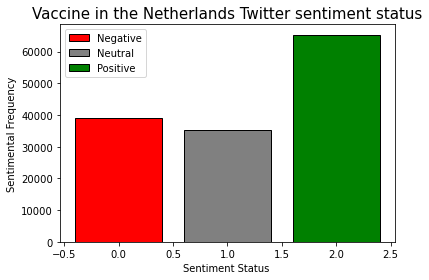

In [236]:
fig, ax = plt.subplots()
index = range(3)
plt.bar(index[0], negative, color = 'red', edgecolor = 'black', width = 0.8)
plt.bar(index[1], neutral, color = 'grey', edgecolor = 'black', width = 0.8)
plt.bar(index[2], positive, color='green', edgecolor = 'black', width = 0.8)
plt.legend(['Negative', 'Neutral', 'Positive'])
plt.xlabel('Sentiment Status ', fontdict = {'size' : 10})
plt.ylabel('Sentimental Frequency', fontdict = {'size' : 10})
plt.title("Vaccine in the Netherlands Twitter sentiment status", fontsize = 15)

<AxesSubplot:title={'center':'Sentiment towards covid-vaccin NL'}, xlabel='Timestamp'>

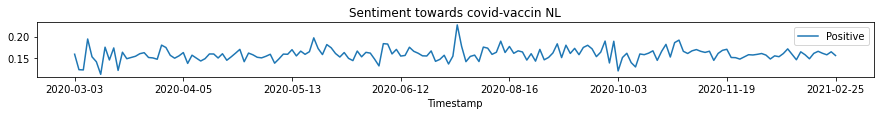

In [149]:
tweets_positive = tweets[['Timestamp', 'Positive']]
tweets_positive = tweets_positive.groupby('Timestamp', as_index=False).mean()
tweets_positive.plot('Timestamp', 'Positive', title='Sentiment towards covid-vaccin NL', figsize=(15, 1))

<AxesSubplot:title={'center':'Sentiment towards covid-vaccin NL'}, xlabel='Timestamp'>

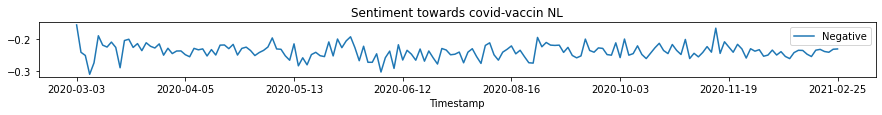

In [150]:
tweets_negative = tweets[['Timestamp', 'Negative']]
tweets_negative = tweets_negative.groupby('Timestamp', as_index=False).mean()
tweets_negative.plot('Timestamp', 'Negative', title='Sentiment towards covid-vaccin NL', figsize=(15, 1))

In [151]:
tweets_mean = tweets[['Timestamp', 'Polarity']]
tweets_mean = tweets_mean.groupby('Timestamp', as_index=False).mean()
print(tweets_mean.head())

    Timestamp  Polarity
0  2020-03-03  0.086173
1  2020-03-04  0.035000
2  2020-03-05  0.021157
3  2020-03-06  0.063040
4  2020-03-07  0.029507


<AxesSubplot:title={'center':'Sentiment towards covid-vaccin NL'}, xlabel='Timestamp'>

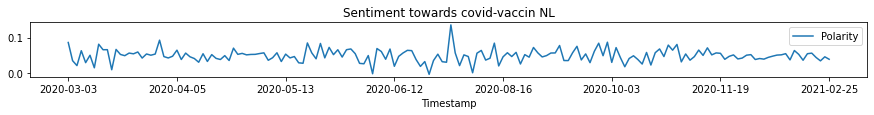

In [152]:
#x = tweets_mean[['Timestamp']]
#y = tweets_mean[['Polarity']]

#plt.plot(x, y)
#plt.show()

tweets_mean.plot('Timestamp', 'Polarity', title='Sentiment towards covid-vaccin NL', figsize=(15, 1))

<AxesSubplot:title={'center':'Number of tweets including keywords over time'}, xlabel='Dates', ylabel='# of tweets'>

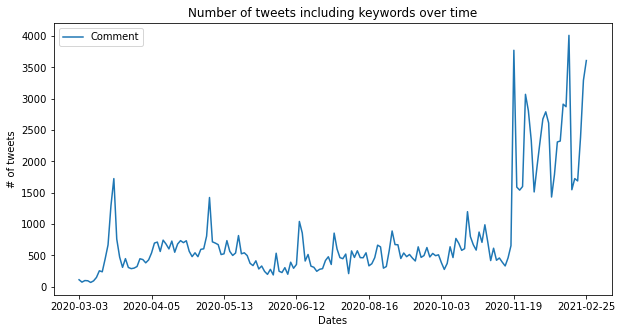

In [153]:
tweets_count = tweets[['Timestamp', 'Comment']]
tweets_count = tweets_count.groupby('Timestamp', as_index=False).count()
tweets_count.plot(x = 'Timestamp', y = 'Comment', xlabel = 'Dates', ylabel = '# of tweets', title = 'Number of tweets including keywords over time', figsize=(10, 5))

In [154]:
tweets_sub = tweets[['Timestamp', 'Subjectivity']]
tweets_sub = tweets_sub.groupby('Timestamp', as_index=False).mean()
print(tweets_sub.head())

    Timestamp  Subjectivity
0  2020-03-03      0.459021
1  2020-03-04      0.472488
2  2020-03-05      0.446773
3  2020-03-06      0.519541
4  2020-03-07      0.449831


<AxesSubplot:title={'center':'Subjectivity in tweets towards covid-vaccin NL'}, xlabel='Timestamp'>

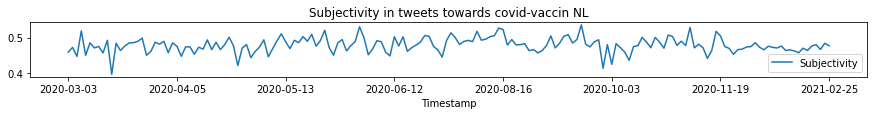

In [155]:
tweets_sub.plot('Timestamp', 'Subjectivity', title='Subjectivity in tweets towards covid-vaccin NL', figsize=(15, 1))

In [156]:
user_count = tweets[['UserName', 'Polarity']]

<AxesSubplot:title={'center':'Average Polarity per user'}, ylabel='UserName'>

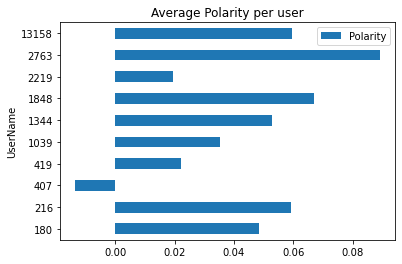

In [157]:
# Top 10 users including their polarity average polarity

n = 10
s = user_count['UserName'].value_counts()[:n].index.tolist()
user_new = user_count.loc[user_count['UserName'].isin(s)]
user_pol = user_new.groupby(['UserName']).Polarity.mean().reset_index()

# Average Polarity per user: Horizontal historgram

user_pol.plot('UserName', 'Polarity', title='Average Polarity per user', kind= 'barh')

<AxesSubplot:title={'center':'Number of tweets per user'}>

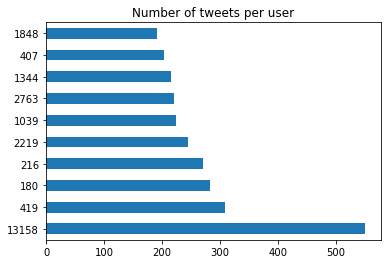

In [158]:
# Top 10 users amount of tweets

n = 10
user_nrtweet = user_count['UserName'].value_counts()[:n]

# Number of tweets per user: Horizontal Histogram

user_nrtweet.plot(title='Number of tweets per user', kind='barh')